# Detecting Depression through NLP and DL

1. Evelyn Peh Ting Yu
2. Koh Pei Ling
3. Lau Wei Ting
4. Song Yu Xiang
5. Jian Yi
6. Luqman Juzaili

In [1]:
# !pip uninstall torch torchvision flag -y
# !pip uninstall torch
# !pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

In [2]:
# import os
# os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64'

In [3]:
#!pip install transformers==3.0.0

In [4]:
# pip install transformers

In [5]:
# pip install torchvision 

In [6]:
# pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

In [7]:
#pip install pandas#!pip install transformers==3.0.0

#pip install transformers

#pip install torchvision 

# pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117
#pip install matplotlib
#pip install seaborn
#pip install nltk
#nltk.download('stopwords')
#pip install wordcloud
#pip install scikit-learn

# pip install emoji-unicode
# pip install emoji --upgrade
# pip uninstall emoji
# pip install emoji==1.7

#pip install imblearn

## 1. Import Libraries

In [8]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud

# Natural language Processing
import re
import nltk
stop=nltk.corpus.stopwords.words('english')
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Emoji
import emoji
from emoji import UNICODE_EMOJI
from nltk.tokenize.casual import TweetTokenizer

# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

from collections import defaultdict
from collections import Counter

# pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.cuda.amp import autocast, GradScaler
torch.cuda.amp.autocast(enabled=True)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Transformers library for BERT
import transformers
from transformers import BertModel
from transformers import BertTokenizer
from transformers import AdamW, get_linear_schedule_with_warmup

import time

/common/home/projectgrps/IS460/IS460G3/jupyterlab-venv-tf/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-02 04:01:53.628674: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 04:01:54.511488: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/apps/software/cuDNN/8.1.1.33-CUDA-11.2.2/lib:/opt/apps/software/CUDA/11.2.2/nvvm/lib64:/opt/apps/software

In [9]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)
pd.get_option('max_colwidth')
pd.set_option('max_colwidth', 500)

<hr>

## 2. Import Datasets

<strong> Dataset 1 </strong>

This dataset comprises around 10.1k dataset extracted from Twitter. It consists of 3 columns. The id, tweets and the labels with 1 indicating the person is suffering from depression and 0   for the inverse. Source: https://www.kaggle.com/datasets/gargmanas/sentimental-analysis-for-tweets

<strong> Dataset 2 </strong>

This dataset comprises around 20k data extracted from Twitter. It consists of information with regards to the post itself: Post_Text, Post_date, Number of retweets, favourites, and have a label as well. Source: https://www.kaggle.com/datasets/infamouscoder/mental-health-social-media?select=Mental-Health-Twitter.csv

In [10]:
df1 = pd.read_csv("sentiment_tweets3.csv")
df2 = pd.read_csv("Mental-Health-Twitter.csv")  # dataset consist of emoji

In [11]:
df1.head()

,Index,message to examine,label (depression result)
0,106,"just had a real good moment. i missssssssss him so much,",0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8,0
3,288,"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [12]:
df1.rename(columns={'message to examine':"Message"},inplace=True)
df1.rename(columns={'label (depression result)':"Label"},inplace=True)

In [13]:
df1.columns

Index(['Index', 'Message', 'Label'], dtype='object')

In [14]:
df1.drop(["Index"],inplace=True,axis=1)

In [15]:
df1.head()

,Message,Label
0,"just had a real good moment. i missssssssss him so much,",0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8,0
3,"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [16]:
df2.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain has other ideas...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety,1013187241,84,211,251,837,1,1


In [17]:
df2.drop(columns=["Unnamed: 0", "post_id", "post_created","user_id",'followers', 'friends', 'favourites', 'statuses', 'retweets'], inplace=True)

In [18]:
df2.rename(columns={"post_text": "Message"}, inplace=True)
df2.rename(columns={"label": "Label"}, inplace=True)

In [19]:
df2.head()

,Message,Label
0,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.,1
1,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",1
2,Awake but tired. I need to sleep but my brain has other ideas...,1
3,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…,1
4,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety,1


###### Merge dataset

In [20]:
df_uncleaned = pd.concat([df1,df2])

In [21]:
df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30314 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  30314 non-null  object
 1   Label    30314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 710.5+ KB


In [22]:
df_uncleaned.shape

(30314, 2)

###### Check for null and duplicate

In [23]:
df_uncleaned.duplicated().sum()

543

In [24]:
df_uncleaned.drop_duplicates(inplace=True)

In [25]:
df_uncleaned.shape

(29771, 2)

In [26]:
##Checking for null values
df_uncleaned.isnull().sum()

Message    0
Label      0
dtype: int64

In [27]:
df_uncleaned.columns

Index(['Message', 'Label'], dtype='object')

<hr>

## 2. Exploratory Data Analysis

###### Target Class Distribution

> imbalance dataset with 59% non-depressive, 41% depressive

In [28]:
df_uncleaned.Label.value_counts(normalize = True)

0    0.590037
1    0.409963
Name: Label, dtype: float64

<AxesSubplot:xlabel='Label', ylabel='count'>

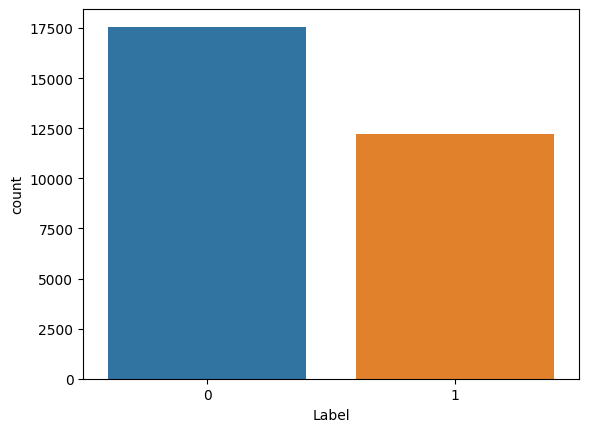

In [29]:
sns.countplot(x=df_uncleaned["Label"])

###### Number of characters in tweets

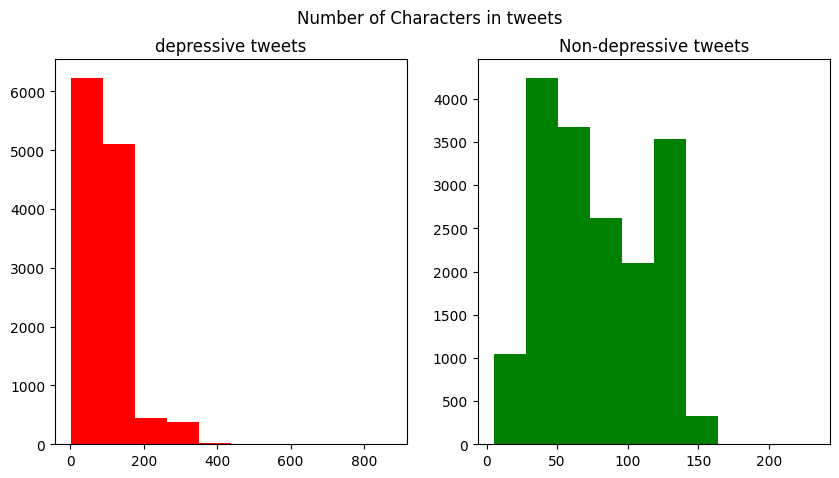

In [30]:
## Number of character
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Number of Characters in tweets')

#depressive
tweet_len=df_uncleaned[df_uncleaned['Label']==1]['Message'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('depressive tweets')

#non-depressive
tweet_len=df_uncleaned[df_uncleaned['Label']==0]['Message'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Non-depressive tweets')

plt.show()

##### Common stopwords in tweets

> In both of classes, "the", "to", "a" dominates 

In [31]:
def create_corpus(target):
    corpus=[]
    
    for x in df_uncleaned[df_uncleaned['Label']==target]['Message'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

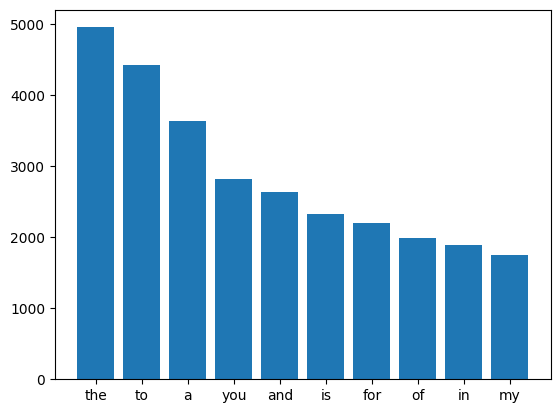

In [32]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

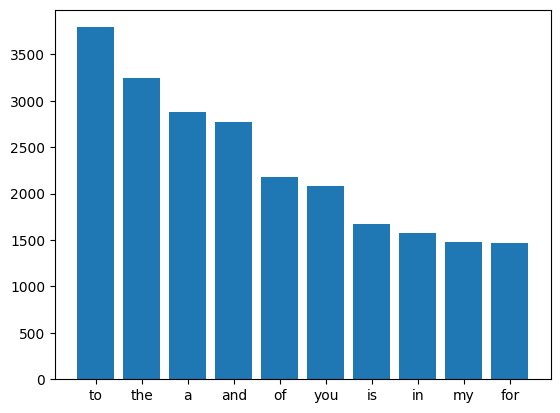

In [33]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

##### Number of Stop Words in a sentence on average 


In [34]:
# This will return us the percentage of Stop Words in Each Tweet. 

percentage_of_stop_word_in_each_tweet = []

def percentage_of_stop_word():
    for x in df_uncleaned['Message']:
        stop_word = 0.0
        total_word_per_sentence = 0.0
        for each_word in x.split(" "):
            if each_word in stop:
                stop_word += 1
            total_word_per_sentence += 1
        
        percentage_of_stop_word_in_each_tweet.append(stop_word/total_word_per_sentence)
    

percentage_of_stop_word()


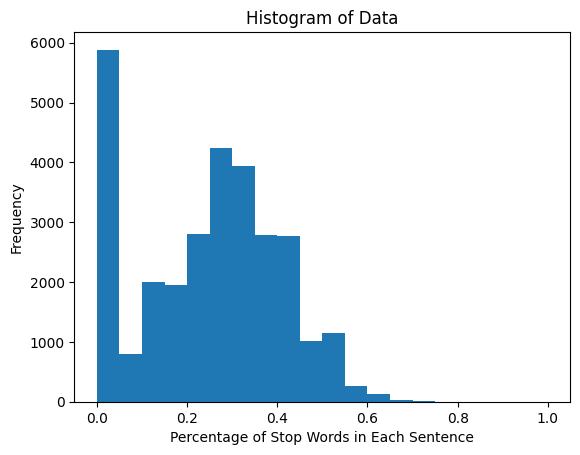

In [35]:
import matplotlib.pyplot as plt

data = percentage_of_stop_word_in_each_tweet

# Create a histogram with 0.05 bin width
bins = list(map(lambda x: x / 20, range(21)))
plt.hist(data, bins=bins)

# Add labels and title
plt.xlabel('Percentage of Stop Words in Each Sentence')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Show the histogram
plt.show()


##### Common punctuation in tweets

<BarContainer object of 25 artists>

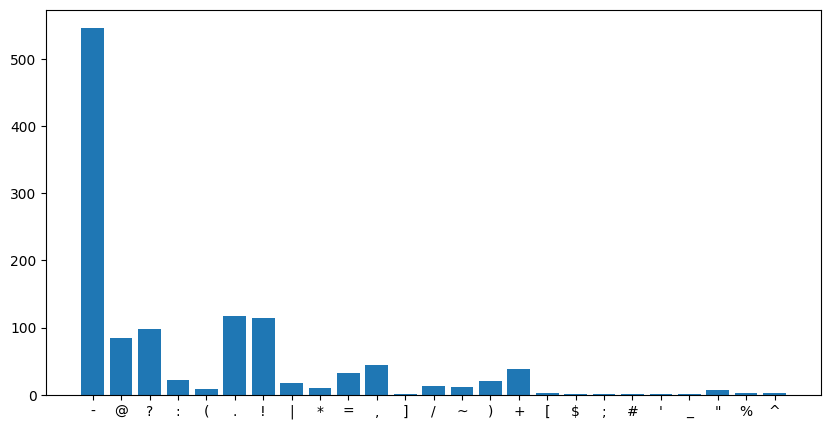

In [36]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 23 artists>

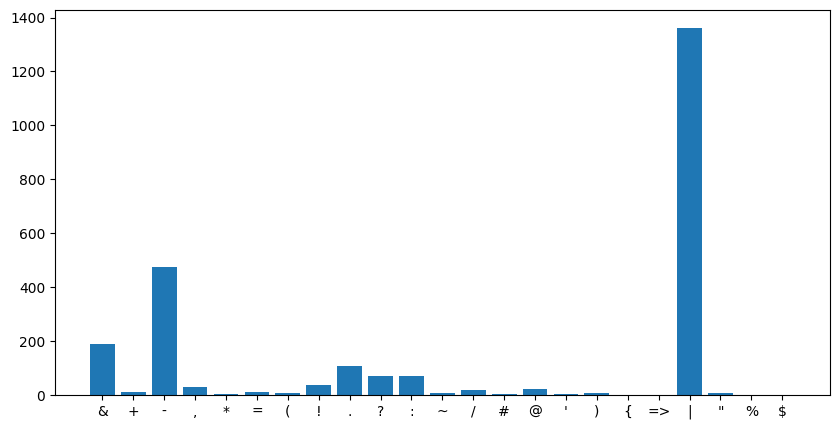

In [37]:
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

##### Common Words

> it can be see that the common words are stop words which implies that data cleaning is neccessary

In [38]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

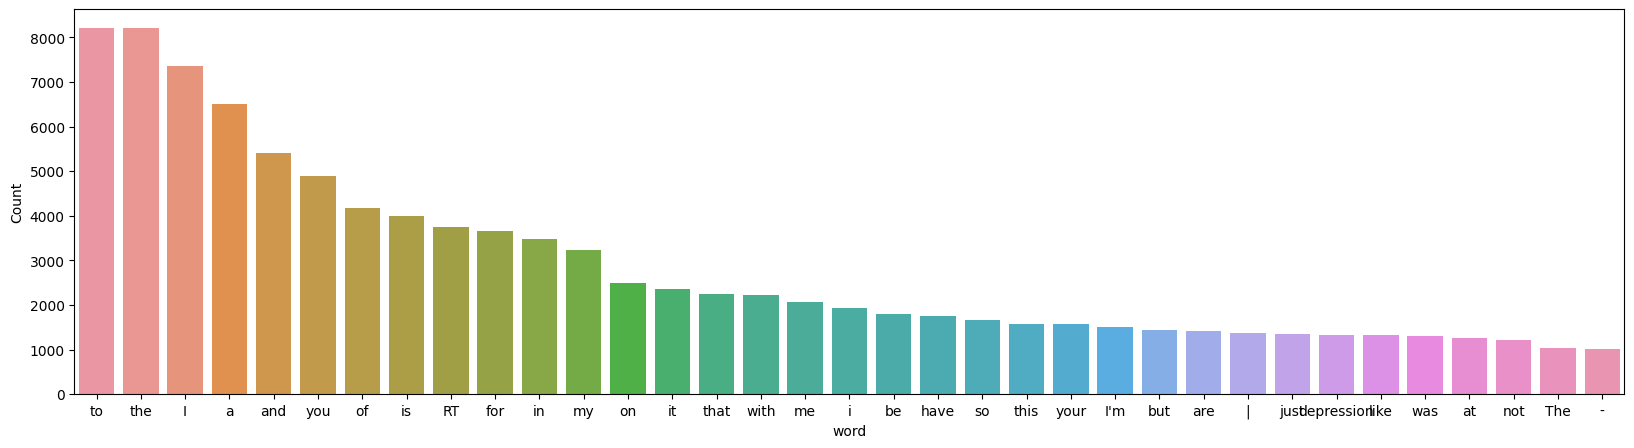

In [39]:
freq_words(df_uncleaned['Message'], 35)

###### Common Words - Bi-Gram Analysis

Bigram (n=2) analysis over the tweets to check the most common bigrams in tweets.

In [40]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

> The most frequent words are often unimportant words such as https which is an internet protocol and other words that does not echo much meaning for people identified with depression. Therefore, there is a need of thorough data cleaning 


<AxesSubplot:>

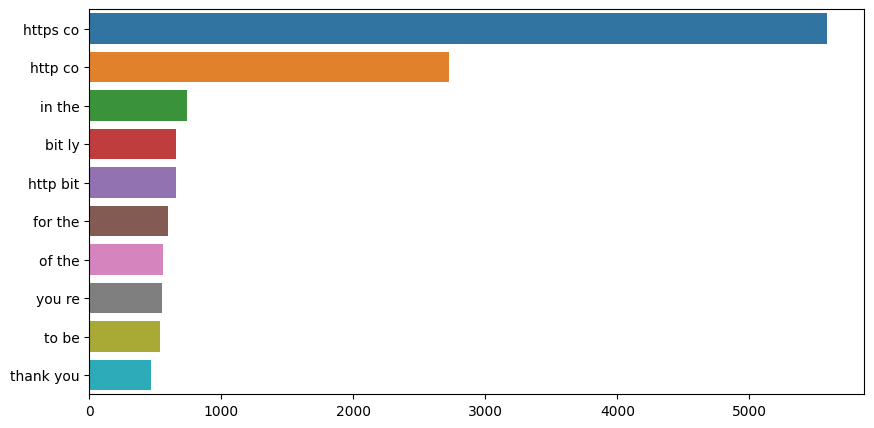

In [41]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(df_uncleaned['Message'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

#### Word Cloud Visualization

Depression Class

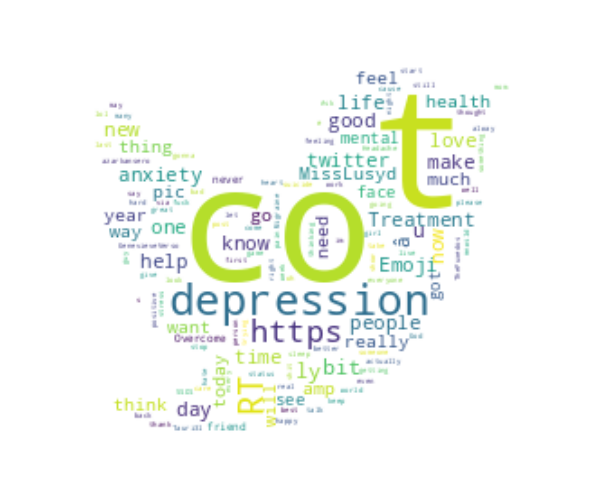

In [42]:
depressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 1]['Message']))
mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, mask=mask, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Non-Depression Class

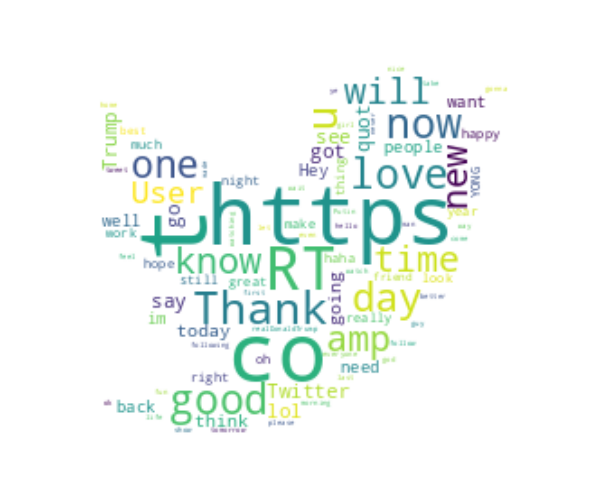

In [43]:
nondepressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 0]['Message']))
mask = np.array(Image.open("Twitter.png"))
nondepressive_wc = WordCloud(collocations=False, mask=mask, background_color="white").generate(nondepressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(nondepressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3. Data Cleaning

In [44]:
## Remerge the data after dropping all RT in the 2nd data set -- substr = "RT @" 
df2 = df2[~df2.Message.str.contains("RT @")]
df_uncleaned = pd.concat([df1,df2])

In [45]:
df_uncleaned.shape

(26609, 2)

###### Convert to Lower Case 

In [46]:
def text_to_lower(text):
    text = text.lower()
    return text

In [47]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:text_to_lower(x))

In [48]:
df_uncleaned.head()

,Message,Label
0,"just had a real good moment. i missssssssss him so much,",0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zogfqvh2me8,0
3,"@lapcat need to send 'em to my accountant tomorrow. oddly, i wasn't even referring to my taxes. those are supporting evidence, though.",0
4,add me on myspace!!! myspace.com/lookthunder,0


###### Removal of HTML entities 

In [49]:
# These are the HTML Entities 
html_entities = {'&nbsp;': '', '&iexcl;': '', '&cent;': '', '&pound;': '', '&curren;': '', '&yen;': '', '&brvbar;': '', 
                  '&sect;': '', '&uml;': '', '&copy;': '', '&reg;': '', '&trade;': '', '&macr;': '', '&deg;': '', 
                  '&plusmn;': '', '&sup2;': '', '&sup3;': '', '&acute;': '', '&micro;': '', '&para;': '', '&middot;': '', 
                  '&cedil;': '', '&sup1;': '', '&ordm;': '', '&raquo;': '', '&frac14;': '', '&frac12;': '', '&frac34;': '', 
                  '&iquest;': '', '&Agrave;': '', '&Aacute;': '', '&Acirc;': '', '&Atilde;': '', '&Auml;': '', 
                  '&Aring;': '', '&AElig;': '', '&Ccedil;': '', '&Egrave;': '', '&Eacute;': '', '&Ecirc;': '', '&Euml;': '', 
                  '&Igrave;': '', '&Iacute;': '', '&Icirc;': '', '&Iuml;': '', '&ETH;': '', '&Ntilde;': '', '&Ograve;': '', 
                  '&Oacute;': '', '&Ocirc;': '', '&Otilde;': '', '&Ouml;': '', '&times;': '', '&Oslash;': '', 
                  '&Ugrave;': '', '&Uacute;': '', '&Ucirc;': '', '&Uuml;': '', '&Yacute;': '', '&THORN;': '', '&szlig;': '', 
                  '&agrave;': '', '&aacute;': '', '&acirc;': '', '&atilde;': '', '&auml;': '', '&aring;': '', '&aelig;': '', 
                  '&ccedil;': '', '&egrave;': '', '&eacute;': '', '&ecirc;': '', '&euml;': '', '&igrave;': '', '&iacute;': '', 
                  '&icirc;': '', '&iuml;': '', '&eth;': '', '&ntilde;': '', '&ograve;': '', '&oacute;': '', '&ocirc;': '', 
                  '&otilde;': '', '&ouml;': '', '&divide;': '','&amp;': '', '&lt;': '', '&gt;': '', '&quot;': '', '&apos;': ''}

In [50]:
html_re = re.compile('(%s)' % '|'.join(html_entities.keys()))

def replace_html_entities(text,contractions_dict=html_entities):
    def replace(match):
        return html_entities[match.group(0)]
    return html_re.sub(replace, text)

df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:replace_html_entities(x))


In [51]:
df_uncleaned.head()

,Message,Label
0,"just had a real good moment. i missssssssss him so much,",0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zogfqvh2me8,0
3,"@lapcat need to send 'em to my accountant tomorrow. oddly, i wasn't even referring to my taxes. those are supporting evidence, though.",0
4,add me on myspace!!! myspace.com/lookthunder,0


###### Removal of Hashtags

In [52]:
# Removal of HashTag
def remove_hashtags (text):
    text = re.sub(r"#\w+", '', text, flags=re.MULTILINE)
    return(text)


In [53]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_hashtags(x))

In [54]:
df_uncleaned.head()

,Message,Label
0,"just had a real good moment. i missssssssss him so much,",0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zogfqvh2me8,0
3,"@lapcat need to send 'em to my accountant tomorrow. oddly, i wasn't even referring to my taxes. those are supporting evidence, though.",0
4,add me on myspace!!! myspace.com/lookthunder,0


###### Conversion of contractions

In [55]:
# Converting it to string type
df_uncleaned['Message'] = df_uncleaned['Message'].astype("str")
df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26609 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  26609 non-null  object
 1   Label    26609 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 623.6+ KB


In [56]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "i'd": "i would", "i'd've": "i would have","i'll": "i will",
                     "i'll've": "i will have","i'm": "i am","i've": "i have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have",
                    
                    "aint": "are not","'s":" is","arent": "are not",
                     "cant": "cannot","cantve": "cannot have",
                     "'cause": "because","couldve": "could have","couldnt": "could not",
                     "couldntve": "could not have", "didnt": "did not","doesnt": "does not",
                     "dont": "do not","hadnt": "had not","hadnt've": "had not have",
                     "hasnt": "has not","havent": "have not","hed": "he would",
                     "hedve": "he would have","hell": "he will", "hellve": "he will have",
                     "howd": "how did","howdy": "how do you","howll": "how will",
                     "id": "i would", "id've": "i would have","ill": "i will",
                     "illve": "i will have","im": "i am","ive": "i have", "isnt": "is not",
                     "itd": "it would","itd've": "it would have","itll": "it will",
                     "itll've": "it will have", "lets": "let us","maam": "madam",
                     "maynt": "may not","mightve": "might have","mightnt": "might not", 
                     "mightntve": "might not have","mustve": "must have","mustnt": "must not",
                     "mustn'tve": "must not have", "neednt": "need not",
                     "needn'tve": "need not have","oclock": "of the clock","oughtnt": "ought not",
                     "oughtntve": "ought not have","shant": "shall not","shant": "shall not",
                     "shantve": "shall not have","shed": "she would","shedve": "she would have",
                     "shell": "she will", "shellve": "she will have","shouldve": "should have",
                     "shouldnt": "should not", "shouldntve": "should not have","sove": "so have",
                     "thatd": "that would","thatdve": "that would have", "thered": "there would",
                     "theredve": "there would have", "theyd": "they would",
                     "theydve": "they would have","theyll": "they will",
                     "theyllve": "they will have", "theyre": "they are","theyve": "they have",
                     "tove": "to have","wasnt": "was not","wed": "we would",
                     "wedve": "we would have","well": "we will","well've": "we will have",
                     "were": "we are","weve": "we have", "werent": "were not","whatll": "what will",
                     "whatllve": "what will have","whatre": "what are", "whatve": "what have",
                     "whenve": "when have","whered": "where did", "whereve": "where have",
                     "wholl": "who will","whollve": "who will have","whove": "who have",
                     "whyve": "why have","willve": "will have","wont": "will not",
                     "wontve": "will not have", "wouldve": "would have","wouldnt": "would not",
                     "wouldntve": "would not have","yall": "you all", "yalld": "you all would",
                     "yalldve": "you all would have","yallre": "you all are",
                     "yallve": "you all have", "youd": "you would","youdve": "you would have",
                     "youll": "you will","youllve": "you will have", "youre": "you are",
                     "youve": "you have"}

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [57]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:expand_contractions(x))

In [58]:
df_uncleaned.head()

,Message,Label
0,"just had a real good moment. i missssssssss hi am so much,",0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zogfqvh2me8,0
3,"@lapcat need to send 'em to my accountant tomorrow. oddly, i was not even referring to my taxes. those are supporting evi wouldence, though.",0
4,add me on myspace!!! myspace.com/lookthunder,0


###### Removal of URL

In [59]:
def remove_urls (text):
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
    return(text)

In [60]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_urls(x))

In [61]:
df_uncleaned.head()

,Message,Label
0,"just had a real good moment. i missssssssss hi am so much,",0
1,is reading manga,0
2,@comeagainjen -,0
3,"@lapcat need to send 'em to my accountant tomorrow. oddly, i was not even referring to my taxes. those are supporting evi wouldence, though.",0
4,add me on myspace!!! myspace.com/lookthunder,0


###### Removal of Mentions/Retweets User Accounts 

In [62]:
def remove_mentions_user (text):
    text = re.sub(r"@\w+", '', text, flags=re.MULTILINE)
    return(text)

In [63]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_mentions_user(x))

In [64]:
df_uncleaned.head()

,Message,Label
0,"just had a real good moment. i missssssssss hi am so much,",0
1,is reading manga,0
2,-,0
3,"need to send 'em to my accountant tomorrow. oddly, i was not even referring to my taxes. those are supporting evi wouldence, though.",0
4,add me on myspace!!! myspace.com/lookthunder,0


###### Removal of Punctuation

In [65]:
def remove_punctuations (text):
    text = re.sub(r"""[!"¦#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~،؟…«“\":\"…”]""", '', text, flags=re.MULTILINE)
    return(text)

df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_punctuations(x))

In [66]:
df_uncleaned.head()

,Message,Label
0,just had a real good moment i missssssssss hi am so much,0
1,is reading manga,0
2,,0
3,need to send em to my accountant tomorrow oddly i was not even referring to my taxes those are supporting evi wouldence though,0
4,add me on myspace myspacecomlookthunder,0


###### Removal of numbers

In [67]:
df_uncleaned['Message'] = df_uncleaned['Message'].str.replace('\d+', '')

/common/home/projectgrps/IS460/IS460G3/jupyterlab-venv-tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [68]:
df_uncleaned.head()

,Message,Label
0,just had a real good moment i missssssssss hi am so much,0
1,is reading manga,0
2,,0
3,need to send em to my accountant tomorrow oddly i was not even referring to my taxes those are supporting evi wouldence though,0
4,add me on myspace myspacecomlookthunder,0


###### Emojis to textual description conversion

Translate emojis to their textual description. This is to ensure that the sentiment value that an emoji contain will also be considered by the model in future parts.
- Utilise TweetTokenizer to split tweets on a list of words, while treating the emoji as a word itself.
- Utilise Emoji demojize to convert the graphical representation of the emoji to its textual representation which seperated by underscore when the description is more than 1 word e.g., smiling_beaming_face, tears_of_joy
- Seperate the textual description of emojis e.g, "smiling_beaming_face" as ['smiling','beaming','face'] to consider it as normal words

#### Need to choose one method (How do we store emoji textual description)

In [69]:
# helper function for convert_emojis; return true if token is an emoji
def is_emoji(s):
    return s in UNICODE_EMOJI

# Break up sentences into list of words while considering emojis
def store_emojis(text):
    
    # break up tweets into words while considering emojis as itself e.g., ['this','is','cool','😁','👍']
    tweet_list = TweetTokenizer().tokenize(text)
    tweet_string = convert_emojis(tweet_list)
    return tweet_string

def convert_emojis(text):
    new_text = []
    
    for i in range(len(text)):
        if is_emoji(text[i]):
            temp = emoji.demojize(text[i], delimiters=("",""))
            
            if "_" in temp:
                temp = temp.split("_")
            
            for item in temp:
                new_text.append(item)
        else:
            new_text.append(text[i])
        
    return ' '.join([str(item) for item in new_text])

In [70]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:store_emojis(x))

In [71]:
df_uncleaned.head()

,Message,Label
0,just had a real good moment i missssssssss hi am so much,0
1,is reading manga,0
2,,0
3,need to send em to my accountant tomorrow oddly i was not even referring to my taxes those are supporting evi wouldence though,0
4,add me on myspace myspacecomlookthunder,0


###### Removal of StopWords 


In [72]:
stopWords = set(stopwords.words('english'))

In [73]:
from string import printable
st = set(printable)
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x: ''.join([" " if  i not in  st else i for i in x]))

In [74]:
import nltk 
def remove_stopwords(paragraph):
    words = nltk.word_tokenize(paragraph)
    wordlist_wo_stopwords=[]
    for w in words:
        if w not in stopWords:
            wordlist_wo_stopwords.append(w)
    return wordlist_wo_stopwords

df_uncleaned['Message'] = df_uncleaned['Message'].astype(str)
df_uncleaned['Message'] = df_uncleaned['Message'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()
df_uncleaned['Message'] = df_uncleaned['Message'].apply(remove_stopwords)

In [75]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x: ' '.join(x))

In [76]:
df_uncleaned.head()

,Message,Label
0,real good moment missssssssss hi much,0
1,reading manga,0
2,,0
3,need send em accountant tomorrow oddly even referring taxes supporting evi wouldence though,0
4,add myspace myspacecomlookthunder,0


###### Tokenisation 

Remove Stop words first then tokenise
- What is tokenization? In essence, it’s splitting a string into smaller units (tokens) 

- After tokenizing the sentence we are provided with a list of all words (and signs) within the sentence. Another common method is sentence tokenization, which splits the text into a list of sentences --> i think maybe no need 

https://www.dataquest.io/blog/how-to-clean-and-prepare-your-data-for-analysis/

In [77]:
# nltk.download('punkt')

In [78]:

df_uncleaned['Tokenised'] = df_uncleaned['Message'].apply(word_tokenize)

In [79]:
df_uncleaned.head()

,Message,Label,Tokenised
0,real good moment missssssssss hi much,0,"[real, good, moment, missssssssss, hi, much]"
1,reading manga,0,"[reading, manga]"
2,,0,[]
3,need send em accountant tomorrow oddly even referring taxes supporting evi wouldence though,0,"[need, send, em, accountant, tomorrow, oddly, even, referring, taxes, supporting, evi, wouldence, though]"
4,add myspace myspacecomlookthunder,0,"[add, myspace, myspacecomlookthunder]"


###### Lemmatization
Lemmatization is a text normalization technique used in Natural Language Processing (NLP), that switches any kind of a word to its base root mode. Lemmatization is responsible for grouping different inflected forms of words into the root form, having the same meaning.

In [80]:
#nltk.download('averaged_perceptron_tagger')

In [81]:
#nltk.download('all')

In [82]:
lemmatizer = WordNetLemmatizer()

def lemmatize_it(text):
    empty = []
    for word, tag in pos_tag(word_tokenize(text)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma = word
            empty.append(lemma)
        else:
            lemma = lemmatizer.lemmatize(word, wntag)
            empty.append(lemma)
    return ' '.join(empty)

df_uncleaned['Message'] = df_uncleaned['Message'].apply(lemmatize_it)

In [83]:
df_uncleaned.head()

,Message,Label,Tokenised
0,real good moment miss hi much,0,"[real, good, moment, missssssssss, hi, much]"
1,reading manga,0,"[reading, manga]"
2,,0,[]
3,need send em accountant tomorrow oddly even refer tax support evi wouldence though,0,"[need, send, em, accountant, tomorrow, oddly, even, referring, taxes, supporting, evi, wouldence, though]"
4,add myspace myspacecomlookthunder,0,"[add, myspace, myspacecomlookthunder]"


<hr>

### 4. Exploratory Data Analysis on Cleaened Dataset

> Getting the most popular words for the whole dataset

In [84]:
# function for checking popular words:
def popular_words(series):
    top = Counter([item for sublist in df_uncleaned['Tokenised'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df_uncleaned['Message'])

,Common_words,count
0,depression,2965
1,would,2140
2,like,1353
3,good,1042
4,ame,995
5,ti,994
6,get,976
7,love,954
8,one,932
9,know,902


**Insights**: We are able to observe the top 20 most common words in the dataset. This will provide us with insights of what words are more significant than the others in detecting depression. More specifically, we will be interested to know how many of these words are from depressed labelled tweets.

> Getting the most popular words for the whole dataset for depressed labelled tweets

In [85]:
df_uncleaned.shape

(26609, 3)

In [86]:
df_uncleaned_depressed = df_uncleaned[df_uncleaned["Label"] == 1] 
df_uncleaned_depressed.shape

(10495, 3)

In [87]:
from collections import Counter

# function for checking popular words in depressed labels:
def popular_words(series):
#     data1['temp_list'] = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df_uncleaned_depressed['Tokenised'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df_uncleaned_depressed['Message'])

,Common_words,count
0,depression,2961
1,would,843
2,like,619
3,get,450
4,people,398
5,ti,386
6,one,386
7,know,374
8,anxiety,364
9,ame,337


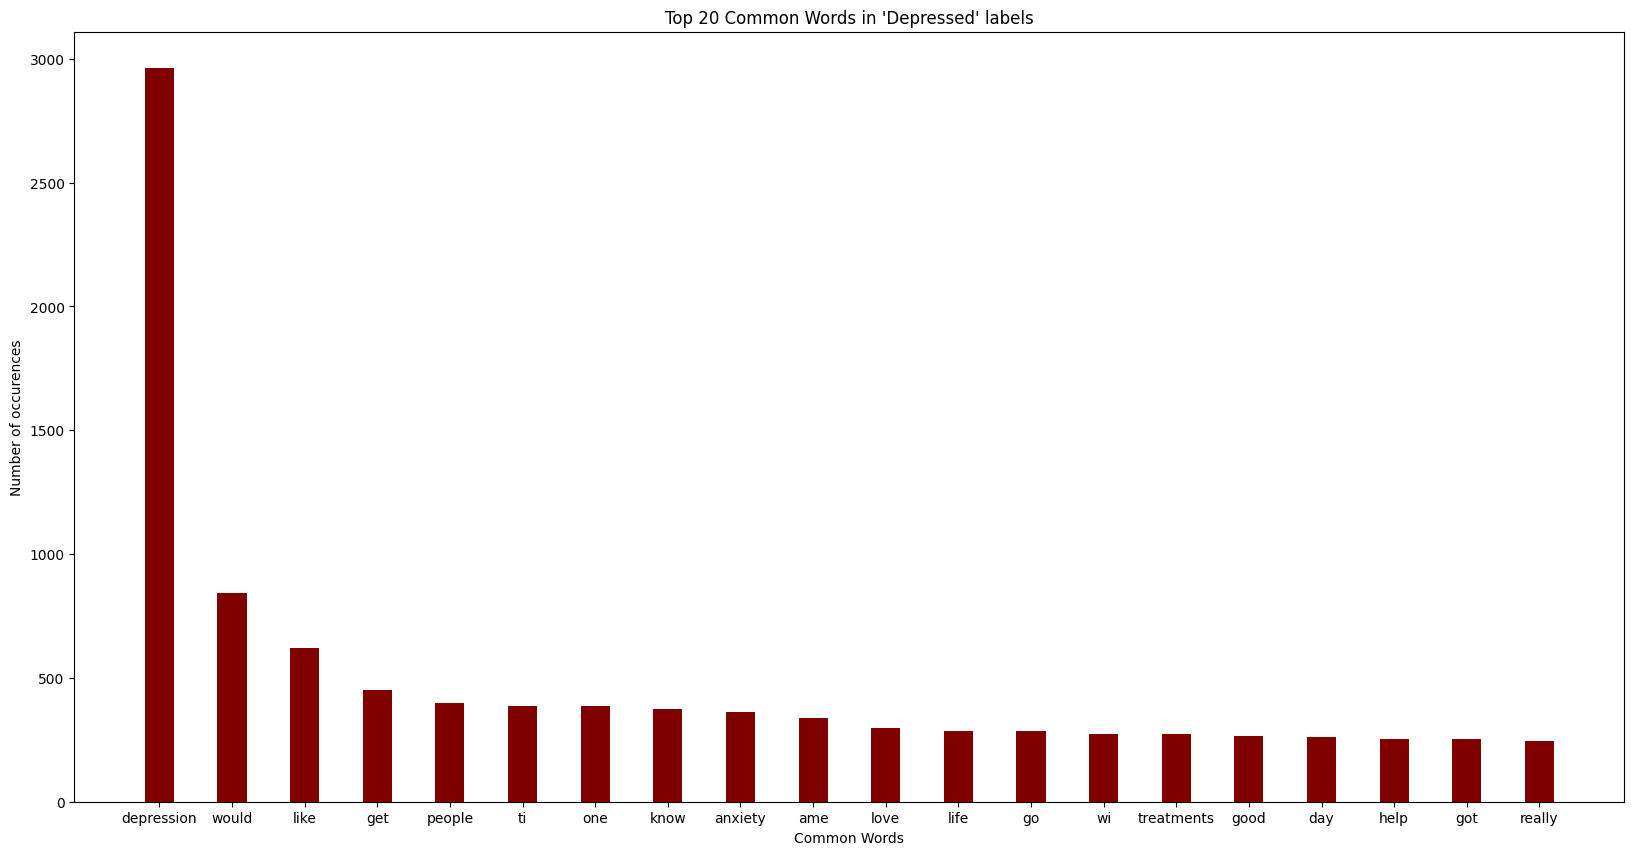

In [88]:
## Visualise in Bar Graph (Popular Words in depressed label)
import matplotlib.pyplot as plt

depressed_words_df = popular_words(df_uncleaned_depressed['Message'])
# depressed_words_df = temp_df.groupby('Common_words').sum().sort_values(by='count',ascending=False)

depressed_words_df
# courses = list(depressed_words_df.keys())
# values = list(depressed_words_df.values())

common_words_list = []
count_list = []

for index, row in depressed_words_df.iterrows():
    common_words_list.append(row['Common_words'])
    count_list.append(row['count'])
    

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(common_words_list, count_list, color ='maroon',
        width = 0.4)
 
plt.xlabel("Common Words")
plt.ylabel("Number of occurences")
plt.title("Top 20 Common Words in 'Depressed' labels")
plt.show()


**Insights**: After taking a deeper look at only depressed labelled tweets, we are able to notice extra words such as "treatments" and "help" to name a few. We are able to also observe that there are many words that are common in the whole dataset also appear for the most common words of depressed labelled tweets. However, some of these words may also appear in non depressed label tweets. Therefore, further filtering can be done to find out the most common words that strictly only appear for depressed labelled tweets to ensure only words representative of the label is extracted.

> Getting the most popular words for the whole dataset for non-depressed labelled tweets

In [89]:
# Find Common Words in non-depressed labels (To see if they are overlaps)
df_uncleaned_nondepressed =df_uncleaned[df_uncleaned["Label"] == 0] 
df_uncleaned_nondepressed.shape

(16114, 3)

In [90]:
# function for checking popular words in non-depressed labels:
def popular_words(series):
#     data1['temp_list'] = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df_uncleaned_nondepressed['Tokenised'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df_uncleaned_nondepressed['Message'])

,Common_words,count
0,would,1297
1,good,778
2,like,734
3,ame,658
4,love,656
5,ti,608
6,wi,582
7,day,559
8,one,546
9,know,528


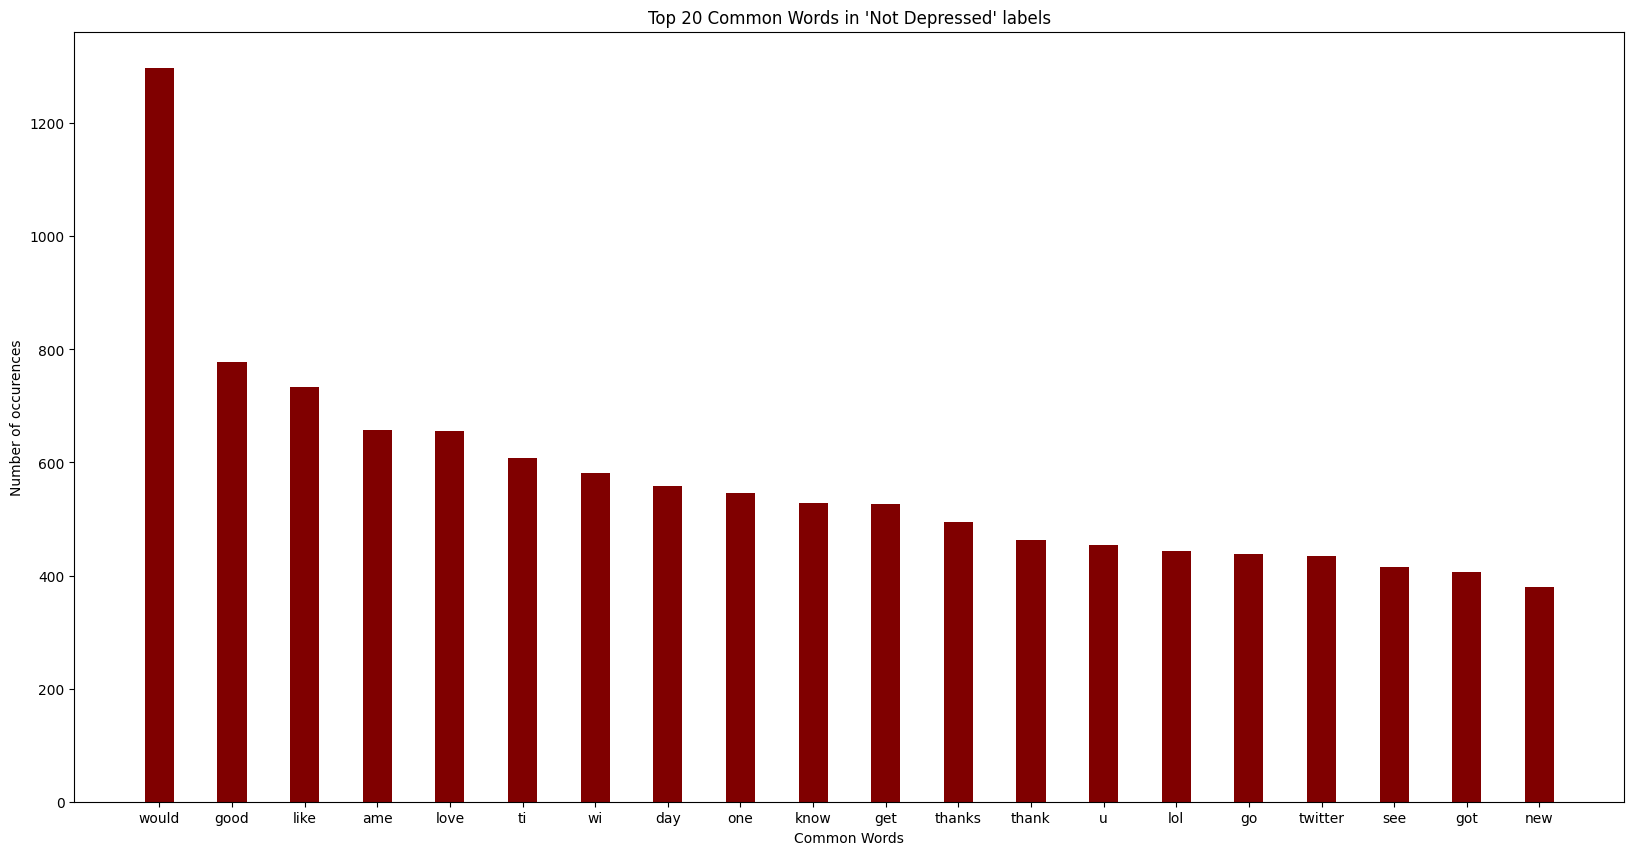

In [91]:
nondepressed_words_df = popular_words(df_uncleaned_nondepressed['Message'])
nondepressed_words_df

common_words_list = []
count_list = []

for index, row in nondepressed_words_df.iterrows():
    common_words_list.append(row['Common_words'])
    count_list.append(row['count'])
    

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(common_words_list, count_list, color ='maroon',
        width = 0.4)
 
plt.xlabel("Common Words")
plt.ylabel("Number of occurences")
plt.title("Top 20 Common Words in 'Not Depressed' labels")
plt.show()

**Insights**: Looking at the common words in the non depressed label tweets, we are able to see words like "would" and "like" which appears in both depressed and non depressed label tweets. We need to filter any other words that may exist in both labels to ensure that we can extract the unique common words of the depressed label tweets.

> Getting the most common unique words for depressed labelled tweets (top words that only appears in depressed labelled tweets)

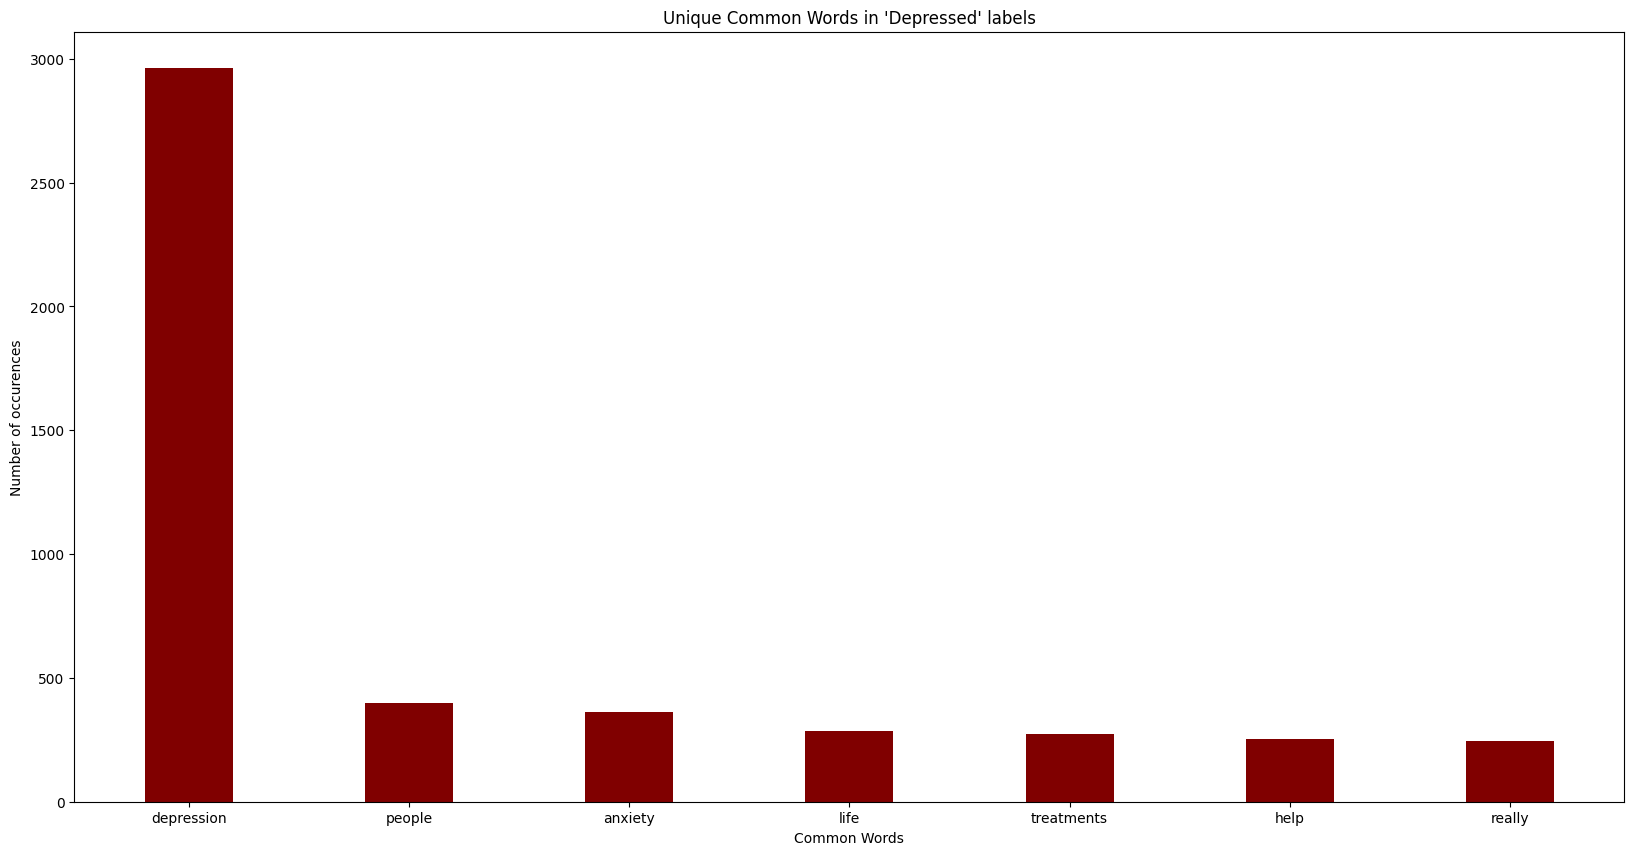

In [92]:
#Find common words in depressed labels that do not appear in non depressed labels

# Depressed dataframe
depressed_words_df

depressed_words = []
depressed_count = []

for index, row in depressed_words_df.iterrows():
    depressed_words.append(row['Common_words'])
    depressed_count.append(row['count'])

# Non Depressed dataframe
nondepressed_words_df

nondepressed_words = []
nondepressed_count = []

for index, row in nondepressed_words_df.iterrows():
    nondepressed_words.append(row['Common_words'])
    nondepressed_count.append(row['count'])


unique_depressed_words = []
unique_depressed_count = []

for i in range(len(depressed_words)):
    if depressed_words[i] not in nondepressed_words:
        unique_depressed_words.append(depressed_words[i])
        unique_depressed_count.append(depressed_count[i])

        
# Plot Bar Graph
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(unique_depressed_words, unique_depressed_count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Common Words")
plt.ylabel("Number of occurences")
plt.title("Unique Common Words in 'Depressed' labels")
plt.show()

**Insights**: After obtaining the unique words for the depressed label tweets, we are able to identify 8 unique words that only exist in the depressed labelled tweets.

<hr>

### 5. Preparing Dataset for Model Training


In [93]:
df_uncleaned.head()

,Message,Label,Tokenised
0,real good moment miss hi much,0,"[real, good, moment, missssssssss, hi, much]"
1,reading manga,0,"[reading, manga]"
2,,0,[]
3,need send em accountant tomorrow oddly even refer tax support evi wouldence though,0,"[need, send, em, accountant, tomorrow, oddly, even, referring, taxes, supporting, evi, wouldence, though]"
4,add myspace myspacecomlookthunder,0,"[add, myspace, myspacecomlookthunder]"


In [94]:
df_cleaned = df_uncleaned[["Message","Label"]]

In [95]:
df_cleaned.reset_index(inplace=True)

In [96]:
df_cleaned.head()

,index,Message,Label
0,0,real good moment miss hi much,0
1,1,reading manga,0
2,2,,0
3,3,need send em accountant tomorrow oddly even refer tax support evi wouldence though,0
4,4,add myspace myspacecomlookthunder,0


In [97]:
df_cleaned.shape

(26609, 3)

In [98]:
list_of_index = df_cleaned[df_cleaned['Message'] == ''].index.values.tolist()
print(f'number of row with empty string: {len(list_of_index)}')

number of row with empty string: 147


In [99]:
df_cleaned.iloc[list_of_index]

,index,Message,Label
2,2,,0
156,156,,0
263,263,,0
526,526,,0
718,718,,0
778,778,,0
809,809,,0
1233,1233,,0
1461,1461,,0
1480,1480,,0


##### Drop row with empty string

In [100]:
df_cleaned.drop(index=list_of_index, inplace = True)

/common/home/projectgrps/IS460/IS460G3/jupyterlab-venv-tf/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [101]:
df_cleaned.shape

(26462, 3)

<hr>

<hr>

## BERT

### BERT + Traditional Classifier (Baseline Models)

In [102]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Define a function to generate BERT embeddings for a given text
def generate_bert_embedding(text):
    # Tokenize the input text and add special tokens
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    # Convert the input tokens to a PyTorch tensor
    input_tensor = torch.tensor([input_ids])
    # Get the hidden states of the BERT model for the input tensor
    with torch.no_grad():
        last_hidden_states = model(input_tensor)[0]
    # Average the last hidden states to generate a single embedding vector
    mean_last_hidden_states = torch.mean(last_hidden_states, dim=1)
    # Convert the embedding vector to a numpy array
    bert_embedding = mean_last_hidden_states.numpy()
    return bert_embedding

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [103]:
%%time
df_cleaned['bert_embedding'] = df_cleaned.Message.apply(generate_bert_embedding)

CPU times: user 1h 54min 13s, sys: 5.47 s, total: 1h 54min 19s
Wall time: 28min 43s


/common/home/projectgrps/IS460/IS460G3/jupyterlab-venv-tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
# Extract features and target variable
X = np.vstack(df_cleaned['bert_embedding'].values)
y = df_cleaned['Label'].values

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=88)

In [100]:
bert_baseline_models = []
bert_baseline_models.append(('Logistic Regression', LogisticRegression(random_state=0)))
bert_baseline_models.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state=0)))
bert_baseline_models.append(('Random Forest', RandomForestClassifier(random_state=0)))
bert_baseline_models.append(("Gradientboost", GradientBoostingClassifier(random_state=345)))
bert_baseline_models.append(('SVM', SVC()))
bert_baseline_models.append(('Gaussian NB', GaussianNB()))

In [95]:
# set table to table to populate with performance results
col = ['BASELINE_MODEL','TRAIN_ACCURACY_MEAN','TEST_ACCURACY', 'PRECISION', 'RECALL','F1 SCORE']

def baselinemodel(baseline_models, Xtrain, ytrain, Xtest, ytest):
    train_acc_results = []
    test_acc_results = []

    df_results = pd.DataFrame(columns=col)
    
    i = 0
    # evaluate each model using cross-validation
    for name, model in baseline_models:
        kfold = KFold(n_splits=10)  # 10-fold cross-validation

        # cv accuracy scoring
        cv_acc_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy')
        train_acc_results.append(cv_acc_results)

        #test accuracy scoring
        model.fit(Xtrain,ytrain)
                
        pred = model.predict(Xtest)
        test_accuracy = accuracy_score(ytest, pred)
        test_acc_results.append(test_accuracy)
        
        #Confusion Matrix
        cm = confusion_matrix(pred,ytest)
        tn = cm[0][0]
        fn = cm[1][0]
        fp = cm[0][1]
        tp = cm[1][1]
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1 = (2*precision*recall)/(precision + recall)

        #names.append(name)
        df_results.loc[i] = [name, round(cv_acc_results.mean()*100, 2), round(test_accuracy*100,2), round(precision*100,2), round(recall*100,2), round(f1*100,2)]

        i += 1
        
    return df_results

In [101]:
%%time
bert_baseline_result = baselinemodel(bert_baseline_models, X_train, y_train, X_test, y_test)

/common/home/projectgrps/IS460/IS460G3/jupyterlab-venv-pytorch/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/common/home/projectgrps/IS460/IS460G3/jupyterlab-venv-pytorch/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for altern

CPU times: user 2h 24min 10s, sys: 13.1 s, total: 2h 24min 23s
Wall time: 2h 24min


In [102]:
bert_baseline_result.sort_values(by=['TEST_ACCURACY', 'F1 SCORE'], ascending=False)

,BASELINE_MODEL,TRAIN_ACCURACY_MEAN,TEST_ACCURACY,PRECISION,RECALL,F1 SCORE
4,SVM,76.81,76.92,51.76,83.51,63.91
3,Gradientboost,75.32,74.74,49.50,78.60,60.75
0,Logistic Regression,75.24,74.52,57.31,72.39,63.97
2,Random Forest,74.66,74.52,45.71,81.67,58.62
5,Gaussian NB,70.30,70.01,61.29,62.20,61.74
1,Decision Tree Classifier,64.89,64.56,55.36,55.09,55.22


<hr> 

### BERT + Deep Learning Models

###### Train - Validation - Test 

In [106]:
X = df_cleaned.Message
y = df_cleaned.Label

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=88)

In [108]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=88)

###### Bert Tokenization
Tokenize the tweets (get "input ids" and "attention masks") for BERT, load the pretrained BERT tokenizer from the Hugging Face library.

In [109]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [110]:
def bert_tokenizer(data):
    input_ids = []
    attention_masks = []
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]` special tokens
            max_length=128,             # Choose max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length 
            return_attention_mask=True      # Return attention mask
            )
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

Then we can tokenize the train, validation and test tweets using the custom define tokenizer.

In [111]:
train_inputs, train_masks = bert_tokenizer(X_train)
val_inputs, val_masks = bert_tokenizer(X_valid)
test_inputs, test_masks = bert_tokenizer(X_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/common/home/projectgrps/IS460/IS460G3/jupyterlab-venv-tf/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Since we are using the BERT model built on PyTorch, we need to convert the arrays to pytorch tensors and create dataloaders for the data.

In [112]:
# Convert target columns to pytorch tensors format
train_labels = torch.from_numpy(y_train.to_numpy())
val_labels = torch.from_numpy(y_valid.to_numpy())
test_labels = torch.from_numpy(y_test.to_numpy())

In [113]:
batch_size = 32

In [114]:
# Create the DataLoader for our train set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

###### Bert Train and Bert Predict Function

In [115]:
# Define Cross entropy Loss function for the multiclass classification task
loss_fn = nn.CrossEntropyLoss()

def bert_train(model, model_name, train_dataloader, val_dataloader, epochs, evaluation=False):

    training_stats = []
    valid_stats = []
    best_valid_loss = 100
    
    print("Start training...\n"), 
    for epoch_i in range(epochs):
        print("-"*10)
        print("Epoch : {}".format(epoch_i+1))
        print("-"*10)
        print("-"*38)
        print(f"{'BATCH NO.':^7} | {'TRAIN LOSS':^12} | {'ELAPSED (s)':^9}")
        print("-"*38)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0
        
        ###TRAINING###

        # Put the model into the training mode
        model.train()

        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass and get logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update model parameters:
            # fine tune BERT params and train additional dense layers
            optimizer.step()
            # update learning rate
            scheduler.step()

            # Print the loss values and time elapsed for every 100 batches
            if (step % 100 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch
                
                print(f"{step:^9} | {batch_loss / batch_counts:^12.6f} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)
        
        training_stats.append(
            {
                'Train Loss': avg_train_loss,
            }
        )

        ###EVALUATION###
        
        # Put the model into the evaluation mode
        model.eval()
        
        # Define empty lists to host accuracy and validation for each batch
        val_accuracy = []
        val_loss = []

        for batch in val_dataloader:
            batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(device) for t in batch)
            
            # We do not want to update the params during the evaluation,
            # So we specify that we dont want to compute the gradients of the tensors
            # by calling the torch.no_grad() method
            with torch.no_grad():
                logits = model(batch_input_ids, batch_attention_mask)

            loss = loss_fn(logits, batch_labels)

            val_loss.append(loss.item())

            # Get the predictions starting from the logits (get index of highest logit)
            preds = torch.argmax(logits, dim=1).flatten()

            # Calculate the validation accuracy 
            accuracy = (preds == batch_labels).cpu().numpy().mean() * 100
            val_accuracy.append(accuracy)

        # Compute the average accuracy and loss over the validation set
        val_loss = np.mean(val_loss)
        val_accuracy = np.mean(val_accuracy)
        
        valid_stats.append(
            {
                'Val Loss': val_loss,
                'Val Accur.': val_accuracy,
            }
        )
        
        
        # Print performance over the entire training data
        time_elapsed = time.time() - t0_epoch
        print("-"*61)
        print(f"{'AVG TRAIN LOSS':^12} | {'VAL LOSS':^10} | {'VAL ACCURACY (%)':^9} | {'ELAPSED (s)':^9}")
        print("-"*61)
        print(f"{avg_train_loss:^14.6f} | {val_loss:^10.6f} | {val_accuracy:^17.2f} | {time_elapsed:^9.2f}")
        print("-"*61)
        print("\n")
        
        if valid_stats[epoch_i]['Val Loss'] < best_valid_loss:
            best_valid_loss = valid_stats[epoch_i]['Val Loss']
            # save best model for use later
            torch.save(model, f'bert-{model_name}-model.pt')  # torch save
            #model_to_save = model.module if hasattr(model, 'module') else model
            #model_to_save.save_pretrained(f'./model_save/bert-{model_name}/')  # transformers save
            #tokenizer.save_pretrained(f'./model_save/bert-{model_name}/')  # transformers save
    
    print("Training complete!")

In [116]:
def bert_predict(model, test_dataloader):
    
    # Define empty list to host the predictions
    preds_list = []
    
    # Put the model into evaluation mode
    model.eval()
    
    for batch in test_dataloader:
        batch_input_ids, batch_attention_mask = tuple(t.to(device) for t in batch)[:2]
        
        # Avoid gradient calculation of tensors by using "no_grad()" method
        with torch.no_grad():
            logit = model(batch_input_ids, batch_attention_mask)
        
        # Get index of highest logit
        pred = torch.argmax(logit,dim=1).cpu().numpy()
        # Append predicted class to list
        preds_list.extend(pred)

    return preds_list

<hr>

### BERT + RNN

In [108]:
class Bert_Classifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(Bert_Classifier, self).__init__()
        
        input_dim = 768
        hidden_dim = 50
        layer_dim =1
        output_dim =2
        
        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')
        
        # Readout layer
        self.linear = nn.Linear(hidden_dim, output_dim)
        
        # Add possibility to freeze the BERT model
        # to avoid fine tuning BERT params (usually leads to worse results)
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
    
    def forward(self, input_ids, attention_mask):
        # Feed input data to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        sequence_output = outputs[0]
        #print("sequence_output size", sequence_output.size())
        sequence_output, _ = self.rnn(sequence_output)
        #print("lstm size", sequence_output.size())
        linear_output = self.linear(sequence_output[:, -1])
        #print("linear_output size", linear_output.size())

        # Feed input to classifier to compute logits
        # logits = self.fc(last_hidden_state_cls)

        return linear_output

In [109]:
def initialize_bert_model(epochs):
    # Instantiate Bert Classifier
    bert_classifier = Bert_Classifier(freeze_bert=False)
    
    bert_classifier.to(device)

    # Set up optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # learning rate, set to default value
                      eps=1e-8    # decay, set to default value
                      )
    
    ### Set up learning rate scheduler ###

    # Calculate total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Defint the scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

<hr>

### BERT + CNN

In [111]:
%%time
class Bert_CNN(nn.Module):

    def __init__(self, freeze_bert=False):
        super().__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased',output_hidden_states=True).cuda()
        output_channel = 16  # number of kernels
        num_classes = 2  # number of targets to predict
        dropout = 0.4  # dropout value
        embedding_dim = 768  # length of embedding dim

        ks = 3  # three conv nets here

        # input_channel = word embeddings at a value of 1; 3 for RGB images
        input_channel = 4  # for single embedding, input_channel = 1

        # 3 convolutional nets
        self.conv1 = nn.Conv2d(input_channel, output_channel, (3, embedding_dim), padding=(2, 0), groups=4)
        self.conv2 = nn.Conv2d(input_channel, output_channel, (4, embedding_dim), padding=(3, 0), groups=4)
        self.conv3 = nn.Conv2d(input_channel, output_channel, (5, embedding_dim), padding=(4, 0), groups=4)

        # apply dropout
        self.dropout = nn.Dropout(dropout)

        # fully connected layer for classification
        # 3x conv nets * output channel
        self.fc1 = nn.Linear(ks * output_channel, num_classes)
        
        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self,inputs, mask):   
        outputs = self.bert(input_ids=inputs,attention_mask=mask) 
        
        x = outputs[2]  # get hidden layers
        x = torch.stack(x, dim=1)  # stack the layers
        x = x[:, -4:]

        x = [F.relu(self.conv1(x)).squeeze(3), F.relu(self.conv2(x)).squeeze(3), F.relu(self.conv3(x)).squeeze(3)]
        # max-over-time pooling; # (batch, channel_output) * ks
        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]
        # concat results; (batch, channel_output * ks)
        x = torch.cat(x, 1)
        # add dropout
        x = self.dropout(x)
        # generate logits (batch, target_size)
        logit = self.fc1(x)
        return logit

CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 21 µs


In [112]:
def initialize_bertcnn_model(epochs):
    # Instantiate Bert Classifier
    bert_cnn_classifier = Bert_CNN(freeze_bert=False)
    
    bert_cnn_classifier.to(device)

    # Set up optimizer
    optimizer = AdamW(bert_cnn_classifier.parameters(),
                      lr=5e-5,    # learning rate, set to default value
                      eps=1e-8    # decay, set to default value
                      )
    
    ### Set up learning rate scheduler ###

    # Calculate total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Defint the scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_cnn_classifier, optimizer, scheduler

<hr>

### BERT + LSTM 

In [117]:
class BERT_LSTM(nn.Module):
    def __init__(self, freeze_bert=False):
        super(BERT_LSTM, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2
        
        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.lstm = nn.LSTM(D_in, H, batch_first=True, bidirectional=False)
        self.linear = nn.Linear(H , D_out)

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        # Move input tensors to CUDA device with index 0
        input_ids = input_ids.to('cuda:0')
        attention_mask = attention_mask.to('cuda:0')

        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = outputs[0]
        #print("sequence_output size", sequence_output.size())

        # Move sequence_output tensor to CUDA device with index 0
        sequence_output = sequence_output.to('cuda:0')

        sequence_output, _ = self.lstm(sequence_output)
        #print("lstm size", sequence_output.size())

        linear_output = self.linear(sequence_output[:, -1])
        #print("linear_output size", linear_output.size())

        return linear_output

In [118]:
def initialize_bertlstm_model(epochs):
    # Instantiate Bert Classifier
    bert_lstm_classifier = BERT_LSTM(freeze_bert=False)
    
    bert_lstm_classifier.to(device)

    # Set up optimizer
    optimizer = AdamW(bert_lstm_classifier.parameters(),
                      lr=5e-5,    # learning rate, set to default value
                      eps=1e-8    # decay, set to default value
                      )
    
    ### Set up learning rate scheduler ###

    # Calculate total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Defint the scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_lstm_classifier, optimizer, scheduler

### BERT + Bi-LSTM

In [119]:
%%time

class BERT_BILSTM(nn.Module):
    def __init__(self, freeze_bert=False):
        super(BERT_BILSTM, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2
        
        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.lstm = nn.LSTM(D_in, H, batch_first=True, bidirectional=True)
        self.linear = nn.Linear(H*2 , D_out)

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,attention_mask=attention_mask)
        sequence_output = outputs[0]
        #print("sequence_output size", sequence_output.size())
        sequence_output, _ = self.lstm(sequence_output)
        #print("lstm size", sequence_output.size())
        linear_output = self.linear(sequence_output[:, -1])
        #print("linear_output size", linear_output.size())

        return linear_output

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 20 µs


In [120]:
def initialize_Bibertlstm_model(epochs):
    # Instantiate Bert Classifier
    bert_lstm_classifier = BERT_BILSTM(freeze_bert=False)

    # Move model to CUDA device with index 0
    bert_lstm_classifier.to('cuda:0')

    # Set up optimizer
    optimizer = AdamW(bert_lstm_classifier.parameters(),
                      lr=5e-5,    # learning rate, set to default value
                      eps=1e-8    # decay, set to default value
                      )

    ### Set up learning rate scheduler ###

    # Calculate total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Defint the scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)

    return bert_lstm_classifier, optimizer, scheduler

<hr>

### Model Training and Testing

#### RNN - Train

In [110]:
bert_classifier, optimizer, scheduler = initialize_bert_model(epochs=10)

In [111]:
bert_train(bert_classifier, "RNN",train_dataloader, val_dataloader, epochs=10)

Start training...

----------
Epoch : 1
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   100    |   0.529398   |   17.61  
   200    |   0.467307   |   16.01  
   300    |   0.470466   |   16.02  
   400    |   0.458596   |   16.08  
   500    |   0.437704   |   16.13  
   595    |   0.422169   |   15.25  
-------------------------------------------------------------
AVG TRAIN LOSS |  VAL LOSS  | VAL ACCURACY (%) | ELAPSED (s)
-------------------------------------------------------------
   0.464736    |  0.418011  |       78.95       |  100.42  
-------------------------------------------------------------


----------
Epoch : 2
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   100    |   0.326546   |   16.30  
   200    |   0.328880   |   16.14  
   300    |   0.322401   |   16.16  
   400    |   0.333450   |   16.19  
   5

#### RNN - Test

In [112]:
bert_classifier = torch.load('bert-Linear-model.pt') ##change the name to RNN

In [113]:
bert_preds = bert_predict(bert_classifier, test_dataloader)

In [114]:
print('Classification Report for BERT + RNN :\n', classification_report(y_test, bert_preds))

Classification Report for BERT + RNN :
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      3209
           1       0.73      0.73      0.73      2084

    accuracy                           0.78      5293
   macro avg       0.77      0.77      0.77      5293
weighted avg       0.78      0.78      0.78      5293



<hr>

#### CNN - Train

In [120]:
bertcnn_classifier, optimizer, scheduler = initialize_bertcnn_model(epochs=10)

In [121]:
bert_train(bertcnn_classifier, "CNN", train_dataloader, val_dataloader, epochs=10)

Start training...

----------
Epoch : 1
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   100    |   0.573931   |   56.55  
   200    |   0.489596   |   55.96  
   300    |   0.458761   |   55.96  
   400    |   0.455034   |   55.98  
   500    |   0.445025   |   55.93  
   595    |   0.431706   |   52.78  
-------------------------------------------------------------
AVG TRAIN LOSS |  VAL LOSS  | VAL ACCURACY (%) | ELAPSED (s)
-------------------------------------------------------------
   0.476209    |  0.409799  |       79.27       |  336.90  
-------------------------------------------------------------


----------
Epoch : 2
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   100    |   0.346838   |   56.48  
   200    |   0.326511   |   56.02  
   300    |   0.346449   |   55.98  
   400    |   0.345314   |   55.98  
   5

#### CNN - Test

In [122]:
bertcnn_classifier = torch.load('bert-CNN-model.pt')

In [123]:
bert_cnn_preds = bert_predict(bertcnn_classifier, test_dataloader)

In [124]:
print('Classification Report for BERT + CNN :\n', classification_report(y_test, bert_cnn_preds))

Classification Report for BERT + CNN :
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      3209
           1       0.77      0.68      0.72      2084

    accuracy                           0.80      5293
   macro avg       0.79      0.78      0.78      5293
weighted avg       0.79      0.80      0.79      5293



<hr>

#### Bi-LSTM - Train

In [121]:
bibertlstm_classifier, optimizer, scheduler = initialize_Bibertlstm_model(epochs=10)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [122]:
bert_train(bibertlstm_classifier, "BiLSTM",train_dataloader, val_dataloader, epochs=10)

Start training...

----------
Epoch : 1
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   100    |   0.545361   |   13.72  
   200    |   0.484142   |   13.61  
   300    |   0.455036   |   13.59  
   400    |   0.465075   |   13.66  
   500    |   0.439813   |   13.69  
   595    |   0.430085   |   12.96  
-------------------------------------------------------------
AVG TRAIN LOSS |  VAL LOSS  | VAL ACCURACY (%) | ELAPSED (s)
-------------------------------------------------------------
   0.470379    |  0.409708  |       80.11       |   83.81  
-------------------------------------------------------------


----------
Epoch : 2
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   100    |   0.344252   |   13.86  
   200    |   0.338268   |   13.73  
   300    |   0.331929   |   13.72  
   400    |   0.336370   |   13.72  
   5

#### Bi-LSTM - Test

In [123]:
bertlstm_classifier = torch.load('bert-BiLSTM-model.pt')

In [124]:
bert_lstm_preds = bert_predict(bertlstm_classifier, test_dataloader)

In [125]:
print('Classification Report for BERT + Bi-LSTM :\n', classification_report(y_test, bert_lstm_preds))

Classification Report for BERT + Bi-LSTM :
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      3209
           1       0.79      0.69      0.74      2084

    accuracy                           0.80      5293
   macro avg       0.80      0.78      0.79      5293
weighted avg       0.80      0.80      0.80      5293



#### LSTM - Train


In [139]:
# !pip uninstall torch -y
# !pip install torch==1.9.0+cu111 -f https://download.pytorch.org/whl/cu111/torch_stable.html

# THis will fix the CUDA

In [126]:
bertlstm_classifier, optimizer, scheduler = initialize_bertlstm_model(epochs=10)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [127]:
bert_train(bertlstm_classifier, "LSTM", train_dataloader, val_dataloader, epochs=10)

Start training...

----------
Epoch : 1
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   100    |   0.523623   |   13.69  
   200    |   0.495022   |   13.55  
   300    |   0.464098   |   13.53  
   400    |   0.449243   |   13.52  
   500    |   0.439452   |   13.52  
   595    |   0.439007   |   12.78  
-------------------------------------------------------------
AVG TRAIN LOSS |  VAL LOSS  | VAL ACCURACY (%) | ELAPSED (s)
-------------------------------------------------------------
   0.468747    |  0.424878  |       77.22       |   83.15  
-------------------------------------------------------------


----------
Epoch : 2
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   100    |   0.351595   |   13.71  
   200    |   0.338284   |   13.55  
   300    |   0.332227   |   13.54  
   400    |   0.345756   |   13.56  
   5

In [128]:
bertlstm_classifier = torch.load('bert-LSTM-model.pt')

In [129]:
bert_lstm_preds = bert_predict(bertlstm_classifier, test_dataloader)

In [130]:
print('Classification Report for BERT + LSTM :\n', classification_report(y_test, bert_lstm_preds))

Classification Report for BERT + LSTM :
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      3209
           1       0.78      0.70      0.74      2084

    accuracy                           0.80      5293
   macro avg       0.80      0.79      0.79      5293
weighted avg       0.80      0.80      0.80      5293



<hr>

# END